In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("bottle.csv")

In [3]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(499, 74)

In [7]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,499.000000,499.000000,499.000000,498.000000,493.000000,0.0,492.000000,0.0,0.0,0.0,...,0.0,499.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.533066,250.000000,340.170341,7.858253,33.627422,NaN,26.181201,NaN,NaN,NaN,...,NaN,342.781563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.562419,144.193157,354.294113,2.909245,0.560089,NaN,0.845776,NaN,NaN,NaN,...,NaN,357.488819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,2.780000,32.630000,NaN,24.870000,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,125.500000,55.000000,5.052500,33.068000,NaN,25.256000,NaN,NaN,NaN,...,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.000000,250.000000,200.000000,8.185000,33.799000,NaN,26.334500,NaN,NaN,NaN,...,NaN,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12.000000,374.500000,588.000000,10.450000,34.130000,NaN,26.982250,NaN,NaN,NaN,...,NaN,592.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,16.000000,499.000000,1352.000000,12.660000,34.450000,NaN,27.450000,NaN,NaN,NaN,...,NaN,1365.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset=dataset[["Salnty","T_degC"]]

In [9]:
dataset.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [10]:
dataset.shape

(499, 2)

In [11]:
dataset.Salnty.isnull().value_counts()

False    493
True       6
Name: Salnty, dtype: int64

In [12]:
dataset.T_degC.isnull().value_counts()

False    498
True       1
Name: T_degC, dtype: int64

In [24]:
dataset=dataset.dropna(axis=0)
dataset.reset_index(drop=True,inplace=True)
dataset.shape

(492, 2)

Text(0, 0.5, 'Salinity')

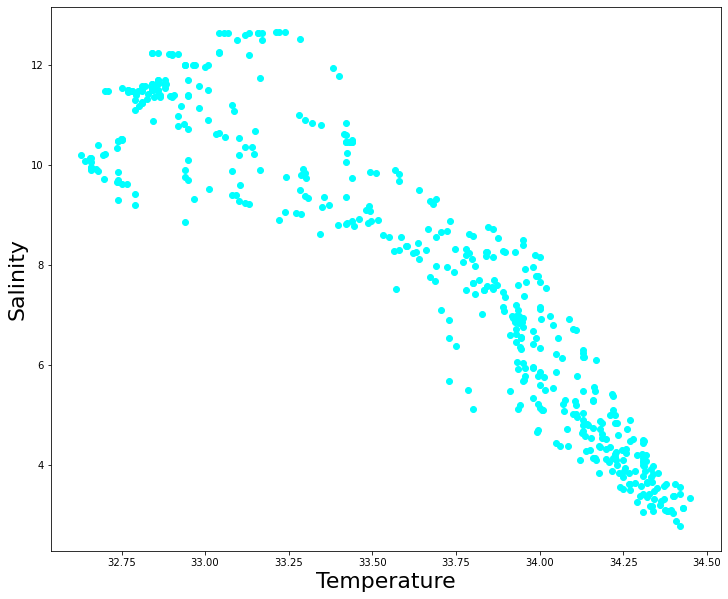

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(dataset.Salnty,dataset.T_degC, color='aqua')
plt.xlabel("Temperature",fontsize=22)
plt.ylabel("Salinity",fontsize=22)

In [25]:
x_label=np.array(dataset['Salnty']).reshape(492,1)
y_label=np.array(dataset['T_degC']).reshape(492,1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size = 0.2, random_state = 100)

In [30]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)
print('Coefficients: ', regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

Coefficients:  [[-4.80500593]]
Intercept:  [169.4247854]


In [31]:
accuracy = regression_model.score(x_test, y_test)

In [32]:
accuracy

0.876504976866808

Text(0.5, 1.0, 'Linear Regression')

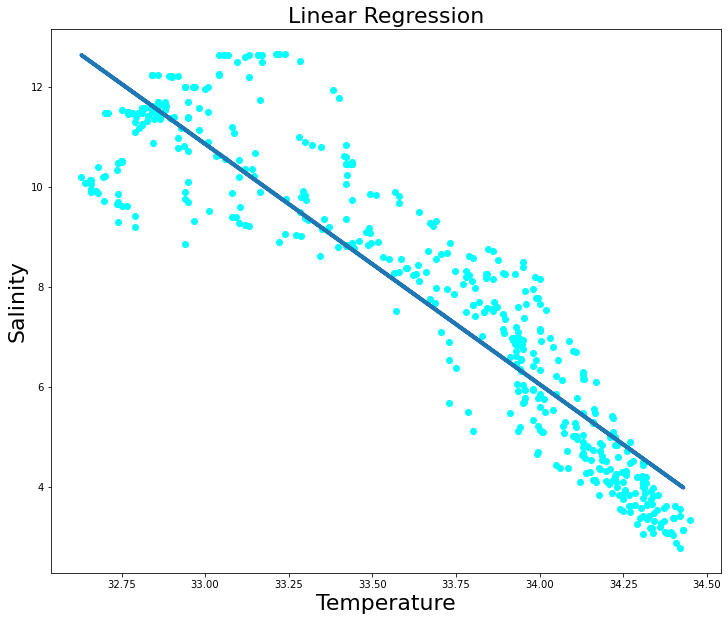

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(x_label, y_label,  color='aqua')
plt.plot(x_train, regression_model.predict(x_train),linewidth="4")
plt.xlabel("Temperature",fontsize=22)
plt.ylabel("Salinity",fontsize=22)
plt.title("Linear Regression",fontsize=22)

In [39]:
y_predicted_value = regression_model.predict(x_test)

In [42]:
print("Mean absolute error:",np.mean(np.absolute(y_predicted_value - y_test)))

Mean absolute error: 0.8090316355920698
